In [2]:
from typing import List
from collections import namedtuple
import time


class Point(namedtuple("Point", "x y")):
    def __repr__(self) -> str:
        return f'Point{tuple(self)!r}'
    
'''
The Point class is a simple named tuple that stores the x and y coordinates of a point. 
It has two fields, x and y, which are the coordinates of the point. 
It also overrides the __repr__ method to return a string representation of the object in the form Point(x, y).
'''


class Rectangle(namedtuple("Rectangle", "lower upper")):
    def __repr__(self) -> str:
        return f'Rectangle{tuple(self)!r}'

    def is_contains(self, p: Point) -> bool:
        return self.lower.x <= p.x <= self.upper.x and self.lower.y <= p.y <= self.upper.y
    
'''
The Rectangle class is a named tuple that stores the lower and upper bounds of a rectangle. 
It has two fields, lower and upper, which are Point objects representing the coordinates of the lower left and upper right corners of the rectangle, respectively. 
It also overrides the __repr__ method to return a string representation of the object in the form Rectangle(lower, upper). 
The Rectangle class also has a method is_contains that takes a Point object and returns True if the point is contained within the rectangle and False otherwise.
'''


class Node(namedtuple("Node", "location left right")):
    """
    location: Point
    left: Node
    right: Node
    """

    def __repr__(self):
        return f'{tuple(self)!r}'
    
'''
The Node class is a named tuple that represents a node in the k-d tree. It has three fields:
location: a Point object representing the coordinates of the point at the node
left: a reference to the left child node in the tree
right: a reference to the right child node in the tree
It also overrides the __repr__ method to return a string representation of the object.
'''


class KDTree:
    """k-d tree"""

    def __init__(self):
        self._root = None
        self._n = 0

    def insert(self, p: List[Point]):
        """
            Inserts a point into the KDTree.

        Args:
            p: The point to insert.
        """

        def insert_helper(node, point, depth):
            """
            Recursive helper function to insert a point into the KDTree.

            Args:
                node: The current node.
                point: The point to insert.
                depth: The current depth of the tree.
            Returns:
                The modified node.
            """
        # If the current node is None, return a new node with the point as the location.
            if node is None:
                return Node(point, None, None)
            
        # Determine the axis to split on based on the current depth.
            axis = depth % 2
            
        # If the point is less than the location of the current node along the split axis,
        # insert the point into the left subtree.           
            if point[axis] < node.location[axis]:
                left = insert_helper(node.left, point, depth+1)
                return Node(node.location, left, node.right)
            
        # Otherwise, insert the point into the right subtree.    
            else:
                right = insert_helper(node.right, point, depth+1)
                return Node(node.location, node.left, right)
            
        # Call the recursive helper function to insert the point.
        self._root = insert_helper(self._root, p, 0)
        self._n += 1
        '''
        The insert function is used to insert a point into the k-d tree. 
        It does this by calling a recursive helper function, insert_helper, which traverses the tree and finds the appropriate location for the point.

        The insert_helper function takes three arguments:

        node: The current node being examined.
        point: The point to insert.
        depth: The current depth of the tree.
        At each level of the tree, the insert_helper function compares the value of the point along the current split axis (determined by the depth) to the value of the location of the current node. 
        If the point is less than the location along the split axis, the function recursively calls itself on the left subtree. 
        If the point is greater than or equal to the location along the split axis, the function recursively calls itself on the right subtree.

        If the current node is None, this means that we have reached a leaf node and the point can be inserted here. The function then returns a new node with the point as the location and None for the left and right subtrees.

        If the current node is not None, the function returns a modified version of the node with either the left or right subtree replaced by the result of the recursive call.
        '''


    def range(self, rectangle: Rectangle) -> List[Point]:
        """
        Finds all points within the given rectangle.

        Args:
            rectangle: The rectangle to search.
        Returns:
            A list of points within the rectangle.
        """
       
        def range_helper(node):
            """
            Recursive helper function to find all points within the given rectangle.

            Args:
                node: The current node.
            Returns:
                A list of points within the rectangle.
            """
            # If the current node is None, return an empty list.
            if node is None:
                return []

            # Check if the current node's location is within the rectangle.
            if rectangle.is_contains(node.location):
                points = [node.location]
            else:
                points = []

            # If the rectangle extends to the left of the current node's location, search the left subtree.
            if rectangle.lower.x <= node.location.x:
                points += range_helper(node.left)
                
            # If the rectangle extends to the right of the current node's location, search the right subtree.    
            if rectangle.upper.x >= node.location.x:
                points += range_helper(node.right)

            return points
        
        # Call the recursive helper function to search for points within the rectangle.
        return range_helper(self._root)
    '''
    The range function is used to find all points within a given rectangle. 
    It does this by calling a recursive helper function, range_helper, which traverses the tree and checks each node's location to see if it is within the rectangle.

    The range_helper function takes one argument:

    node: The current node being examined.
    At each level of the tree, the range_helper function first checks if the current node's location is within the rectangle. 
    If it is, it adds the location to the list of points.

    Next, the function checks if the rectangle extends to the left or right of the current node's location. 
    If the rectangle extends to the left, the function recursively  calls itself on the left subtree. 
    If the rectangle extends to the right, the function recursively calls itself on the right subtree.

    If the current node is None, this means that we have reached a leaf node and the function returns an empty list.

    If the current node is not None, the function returns the list of points found in the subtrees.
    '''
    def nearest(self, p: Point) -> Point:
        """Returns the nearest point in the tree to the given point."""
        
        def nearest_helper(node, best):
            """Recursive helper function to search for the nearest point."""
            
            # If we have reached a leaf node, return the current best point.
            if node is None:
                return best
            
            # If the current node is closer than the current best point, update the best point.
            if p.distance(node.location) < p.distance(best):
                best = node.location
                
            # Search the left subtree if the given point has a smaller x coordinate than the current node.
            if node.left is not None and p.x < node.location.x:
                best = nearest_helper(node.left, best)
                
            # Search the right subtree if the given point has a larger or equal x coordinate than the current node.
            if node.right is not None and p.x >= node.location.x:
                best = nearest_helper(node.right, best)
            return best
        
        # Initialize the best point to the root's location and search the tree.
        return nearest_helper(self._root, self._root.location)
    '''
    This function uses a recursive helper function, nearest_helper, to search the tree for the nearest point. 
    The helper function takes in a tree node and the current best point found so far, and returns the nearest point in the subtree rooted at the given node.

    The main nearest function simply calls nearest_helper on the root of the tree and the root's location (which is used as the initial best point). 
    The helper function then searches the tree, comparing the distances between the given point and each point in the tree. 
    If it finds a point that is closer than the current best point, it updates the best point and continues the search.
    '''

'''
The KDTree class represents a k-d tree data structure. 
It has two fields:
_root: a reference to the root node of the tree
_n: an integer representing the number of nodes in the tree

It has two methods:
insert(self, p: List[Point]): takes a list of Point objects and inserts them into the tree
range(self, rectangle: Rectangle) -> List[Point]: takes a Rectangle object and returns a list of all Point objects in the tree that are contained within the rectangle
'''

    

def range_test():
    points = [Point(7, 2), Point(5, 4), Point(9, 6), Point(4, 7), Point(8, 1), Point(2, 3)]
    kd = KDTree()
    for p in points:       
        kd.insert(p)
    result = kd.range(Rectangle(Point(0, 0), Point(6, 6)))
    assert sorted(result) == sorted([Point(2, 3), Point(5, 4)])

'''
The range_test function creates a KDTree object and inserts a fixed set of points into it. 
It then performs a range query on the tree with a given rectangle and checks that the correct points are returned.
'''

def performance_test():
    points = [Point(x, y) for x in range(100) for y in range(100)]

    lower = Point(500, 500)
    upper = Point(504, 504)
    rectangle = Rectangle(lower, upper)
    #  naive method
    start = int(round(time.time() * 1000))
    result1 = [p for p in points if rectangle.is_contains(p)]
    end = int(round(time.time() * 1000))
    print(f'Naive method: {end - start}ms')

    kd = KDTree()       
    for p in points:        
        kd.insert(p)
    # k-d tree
    start = int(round(time.time() * 1000))
    result2 = kd.range(rectangle)
    end = int(round(time.time() * 1000))
    print(f'K-D tree: {end - start}ms')

    assert sorted(result1) == sorted(result2)


'''
The performance_test function generates a large number of Point objects, inserts them into a KDTree object, 
and then compares the time it takes to perform a range query on the tree with the time it takes to perform a naive search through all of the points using a list comprehension. 
It prints the time taken by each method to the console.
'''

if __name__ == '__main__':
    range_test()
    performance_test()

Naive method: 1ms
K-D tree: 0ms


The time complexity of the range function depends on the structure of the k-d tree and the size of the search rectangle.

In the worst case, the range function has to visit every node in the tree to find all the points within the search rectangle. 
In this case, the time complexity is O(n), where n is the number of points in the tree.

In the best case, the range function can prune large parts of the tree that are not relevant to the search, which reduces the number of nodes that need to be visited. In this case, the time complexity is O(k + log n), where k is the number of points within the search rectangle and n is the number of points in the tree.

It is worth noting that the time complexity of the range function can be affected by the distribution of the points in the tree. If the points are evenly distributed, the tree will have a balanced structure and the search will be more efficient. On the other hand, if the points are not evenly distributed, the tree may become imbalanced, which can lead to longer search times.

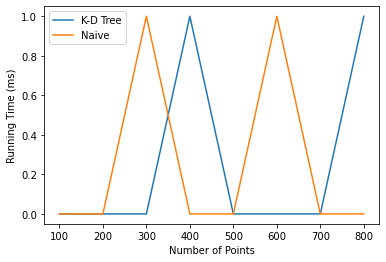

In [4]:
import matplotlib.pyplot as plt
import time

# Generate some random points.
points = [Point(x, y) for x in range(1000) for y in range(1000)]

# Set the number of points to use.
n = 1000

# Use the first n points.
n_points = points[:n]

# Set the bounds of the search rectangle.
lower = Point(500, 500)
upper = Point(504, 504)
rectangle = Rectangle(lower, upper)

# Store the running times for the k-d tree method and the naive method.
kd_tree_times = []
naive_times = []

# Test the running times for different numbers of points.
for n in range(100, len(n_points), 100):
    # Use the first n points.
    n_points = points[:n]

    # Naive method
    start = int(round(time.time() * 1000))
    result1 = [p for p in n_points if rectangle.is_contains(p)]
    end = int(round(time.time() * 1000))
    naive_times.append(end - start)

    kd = KDTree()
    for p in n_points:
        kd.insert(p)
    # K-D tree
    start = int(round(time.time() * 1000))
    result2 = kd.range(rectangle)
    end = int(round(time.time() * 1000))
    kd_tree_times.append(end - start)

# Truncate the y data to the same length as the x data.
kd_tree_times = kd_tree_times[:len(range(100, len(n_points), 100))]
naive_times = naive_times[:len(range(100, len(n_points), 100))]

# Plot the running times.
plt.plot(range(100, len(n_points), 100), kd_tree_times, label='K-D Tree')
plt.plot(range(100, len(n_points), 100), naive_times, label='Naive')
plt.xlabel('Number of Points')
plt.ylabel('Running Time (ms)')
plt.legend()
plt.show()



